In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-01-28

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# use any 3 tickers, I just use 3 vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed
# and add more variables for weights in simulation block.

num_simulation = 1000
assets = ['VOO', 'VYM', 'VHT']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close'] 

In [4]:
pf_data.head() #makre sure companies were public at starting date

,VOO,VYM,VHT
Date,,,
2018-01-02,230.026459,75.506035,146.987457
2018-01-03,231.394958,75.752098,148.447357
2018-01-04,232.409668,76.086044,148.485001
2018-01-05,233.899200,76.428772,149.652908
2018-01-08,234.383301,76.569374,148.937103


In [5]:
pf_data.tail() #check companies still open and public at ending date

,VOO,VYM,VHT
Date,,,
2022-01-24,404.369995,110.080002,241.110001
2022-01-25,399.459991,110.160004,238.850006
2022-01-26,398.559998,109.660004,237.559998
2022-01-27,396.540009,109.529999,236.850006
2022-01-28,394.489899,108.489998,235.570007


<AxesSubplot:xlabel='Date'>

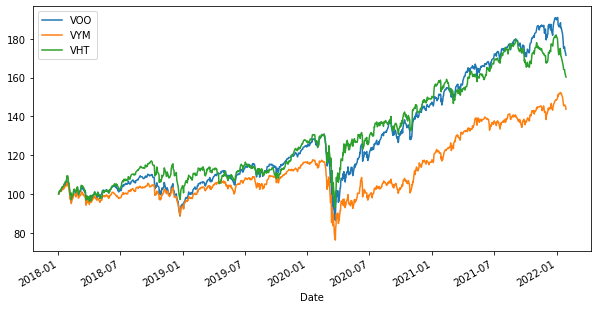

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [8]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

VOO    0.131433
VYM    0.088315
VHT    0.114927
dtype: float64

In [9]:
log_returns.cov() * 250 #get coveriance between each pair.

,VOO,VYM,VHT
VOO,0.044726,0.040443,0.038101
VYM,0.040443,0.041412,0.034637
VHT,0.038101,0.034637,0.040329


In [10]:
log_returns.corr() #get correlation between each pair.

,VOO,VYM,VHT
VOO,1.000000,0.939724,0.897106
VYM,0.939724,1.000000,0.847552
VHT,0.897106,0.847552,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [11]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

# create more weights if inputs more tickers. 
w0 = []
w1 = []
w2 = [] 

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
w0 = np.array(w0)
w1 = np.array(w1)
w2 = np.array(w2)

pfolio_returns, pfolio_volatilities, w0, w1, w2

(array([0.11410869, 0.10617772, 0.12090682, 0.11082077, 0.10364343,
        0.11741494, 0.09458706, 0.11749311, 0.11181269, 0.10529243,
        0.12078371, 0.11523835, 0.11496457, 0.11366887, 0.10511837,
        0.11414547, 0.11103588, 0.09727968, 0.10943483, 0.10996182,
        0.12443638, 0.10540495, 0.10401564, 0.10925258, 0.11422134,
        0.10849752, 0.10593177, 0.11430598, 0.11310051, 0.10615912,
        0.09453777, 0.09688587, 0.11124196, 0.11100285, 0.11422234,
        0.11165956, 0.1148709 , 0.10636222, 0.10451356, 0.10287228,
        0.11477281, 0.10961684, 0.10985239, 0.11121732, 0.10134858,
        0.10332255, 0.1248644 , 0.10865519, 0.10922874, 0.11431307,
        0.11002823, 0.11146822, 0.11522516, 0.10393342, 0.09710231,
        0.1074751 , 0.09872306, 0.10400156, 0.11687128, 0.11117021,
        0.11890257, 0.10793052, 0.11525183, 0.10542004, 0.10877903,
        0.11277496, 0.12172985, 0.10905389, 0.11949842, 0.11359355,
        0.11645528, 0.10523393, 0.10630944, 0.11

In [12]:
# build simulated portfolios.
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities, assets[0]: w0, assets[1]: w1, assets[2]: w2})

In [13]:
portfolios.head() #checking to see if any error

,Return,Volatility,VOO,VYM,VHT
0,0.114109,0.198490,0.065823,0.071579,0.862598
1,0.106178,0.195878,0.162165,0.429356,0.408479
2,0.120907,0.206089,0.726933,0.226163,0.046904
3,0.110821,0.197411,0.296226,0.338032,0.365742
4,0.103643,0.199736,0.265103,0.588432,0.146465


In [14]:
portfolios.tail() #checking to see if any error

,Return,Volatility,VOO,VYM,VHT
995,0.108262,0.202857,0.434804,0.520146,0.045050
996,0.104265,0.196004,0.143773,0.489841,0.366386
997,0.101391,0.199188,0.204455,0.635471,0.160075
998,0.108474,0.202608,0.432789,0.510935,0.056277
999,0.120735,0.199744,0.445591,0.058110,0.496299


In [15]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,VOO,VYM,VHT
431,0.102169,0.194273,0.001570,0.480388,0.518041
606,0.102599,0.194284,0.004969,0.466346,0.528685
497,0.103276,0.194285,0.005156,0.441031,0.553813
734,0.103310,0.194319,0.010102,0.442785,0.547114
57,0.104002,0.194345,0.008417,0.415771,0.575812
...,...,...,...,...,...
783,0.128498,0.207237,0.847311,0.015575,0.137114
201,0.126851,0.207442,0.838516,0.072008,0.089476
858,0.127005,0.207491,0.841570,0.068110,0.090320
832,0.129346,0.209670,0.928674,0.034185,0.037141


Text(0, 0.5, 'Expected Return')

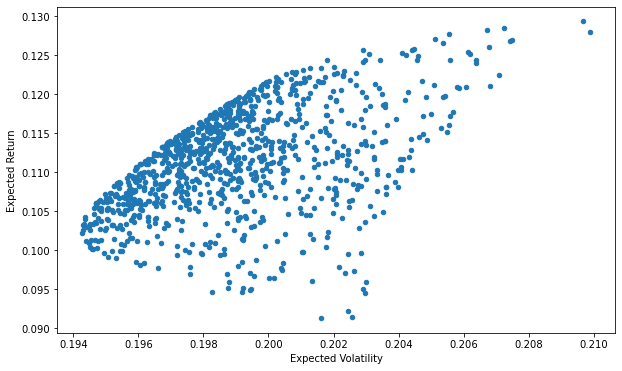

In [16]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [ ]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)